In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod1.csv"
df = pd.read_csv(url)
df.head(10)

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.560,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837
5,5,Dell,3,Full HD,1,1,5,39.624,1.6,8,256,2.20,1016
6,6,HP,3,Full HD,3,1,5,39.624,1.6,8,256,2.10,1117
7,7,Acer,3,IPS Panel,2,1,5,38.100,1.6,4,256,2.20,866
8,8,Dell,3,Full HD,1,1,5,39.624,2.5,4,256,2.30,812
9,9,Acer,3,IPS Panel,3,1,7,38.100,1.8,8,256,2.20,1068


In [5]:
df["Screen_Size_cm"] = np.round(df["Screen_Size_cm"], 2)
df.head(10)

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.62,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.62,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.78,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.62,1.8,8,256,1.91,837
5,5,Dell,3,Full HD,1,1,5,39.62,1.6,8,256,2.20,1016
6,6,HP,3,Full HD,3,1,5,39.62,1.6,8,256,2.10,1117
7,7,Acer,3,IPS Panel,2,1,5,38.10,1.6,4,256,2.20,866
8,8,Dell,3,Full HD,1,1,5,39.62,2.5,4,256,2.30,812
9,9,Acer,3,IPS Panel,3,1,7,38.10,1.8,8,256,2.20,1068


# Identify missing data

In [7]:
miss_data = df.isnull()
miss_data.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
for column in miss_data.columns.tolist(): # Loop through each colums in the DataFrame
    print(miss_data[column].value_counts()) # print the value counts for the current column
    print("") # print empty line

Unnamed: 0
False    238
Name: count, dtype: int64

Manufacturer
False    238
Name: count, dtype: int64

Category
False    238
Name: count, dtype: int64

Screen
False    238
Name: count, dtype: int64

GPU
False    238
Name: count, dtype: int64

OS
False    238
Name: count, dtype: int64

CPU_core
False    238
Name: count, dtype: int64

Screen_Size_cm
False    234
True       4
Name: count, dtype: int64

CPU_frequency
False    238
Name: count, dtype: int64

RAM_GB
False    238
Name: count, dtype: int64

Storage_GB_SSD
False    238
Name: count, dtype: int64

Weight_kg
False    233
True       5
Name: count, dtype: int64

Price
False    238
Name: count, dtype: int64



column: Screen Size & Weight_kg have missing value

## Replace missing value with mean for column Weight_kg

In [16]:
mean = df["Weight_kg"].mean()
print(mean)

1.8622317596566522


In [17]:
df["Weight_kg"].replace(np.nan, mean, inplace = True)

C:\Users\JASONQ~1\AppData\Local\Temp/ipykernel_2876/1652045254.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Weight_kg"].replace(np.nan, mean, inplace = True)


In [21]:
miss_data = df.isnull()
miss_data["Weight_kg"].value_counts() # check if replace successful

Weight_kg
False    238
Name: count, dtype: int64

## Replace value with most frequence number for column Screen Size

In [25]:
frq = df["Screen_Size_cm"].value_counts().idxmax() #returen the index of most frequent value
print(frq)

39.62


In [24]:
df["Screen_Size_cm"].value_counts()

Screen_Size_cm
39.62    89
35.56    64
38.10    23
33.78    20
33.02    18
43.94     7
43.18     5
31.75     4
30.48     4
Name: count, dtype: int64

In [26]:
miss_data["Screen_Size_cm"].value_counts()

Screen_Size_cm
False    234
True       4
Name: count, dtype: int64

In [28]:
df["Screen_Size_cm"].replace(np.nan, frq, inplace = True)

In [30]:
df["Screen_Size_cm"].value_counts() # check if replace successful

Screen_Size_cm
39.62    93
35.56    64
38.10    23
33.78    20
33.02    18
43.94     7
43.18     5
31.75     4
30.48     4
Name: count, dtype: int64

## Fixing the data types: transforming column Weight_kg and Screen Size from object to float 

In [40]:
df.dtypes

Unnamed: 0          int64
Manufacturer       object
Category            int64
Screen             object
GPU                 int64
OS                  int64
CPU_core            int64
Screen_Size_cm     object
CPU_frequency     float64
RAM_GB              int64
Storage_GB_SSD      int64
Weight_kg          object
Price               int64
dtype: object

In [41]:
df["Weight_kg"] = df["Weight_kg"].astype(float)
df["Screen_Size_cm"] = df["Screen_Size_cm"].astype(float)

In [42]:
df.dtypes

Unnamed: 0          int64
Manufacturer       object
Category            int64
Screen             object
GPU                 int64
OS                  int64
CPU_core            int64
Screen_Size_cm    float64
CPU_frequency     float64
RAM_GB              int64
Storage_GB_SSD      int64
Weight_kg         float64
Price               int64
dtype: object

## Data Standardization: covert cm to inch for Screen_Size_cm, kg to pounds for Weight_kg ,and rename the column

In [43]:
df.head(10)

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.62,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.62,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.78,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.62,1.8,8,256,1.91,837
5,5,Dell,3,Full HD,1,1,5,39.62,1.6,8,256,2.20,1016
6,6,HP,3,Full HD,3,1,5,39.62,1.6,8,256,2.10,1117
7,7,Acer,3,IPS Panel,2,1,5,38.10,1.6,4,256,2.20,866
8,8,Dell,3,Full HD,1,1,5,39.62,2.5,4,256,2.30,812
9,9,Acer,3,IPS Panel,3,1,7,38.10,1.8,8,256,2.20,1068


In [44]:
df["Screen_Size_cm"] = df["Screen_Size_cm"] / 2.54

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,14.000000,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,15.598425,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,15.598425,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,13.299213,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,15.598425,1.8,8,256,1.91,837
5,5,Dell,3,Full HD,1,1,5,15.598425,1.6,8,256,2.20,1016
6,6,HP,3,Full HD,3,1,5,15.598425,1.6,8,256,2.10,1117
7,7,Acer,3,IPS Panel,2,1,5,15.000000,1.6,4,256,2.20,866
8,8,Dell,3,Full HD,1,1,5,15.598425,2.5,4,256,2.30,812
9,9,Acer,3,IPS Panel,3,1,7,15.000000,1.8,8,256,2.20,1068


In [46]:
df.rename(columns = {"Screen_Size_cm":"Screen_Size_inch"}, inplace = True)
df.head(10)

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,14.000000,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,15.598425,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,15.598425,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,13.299213,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,15.598425,1.8,8,256,1.91,837
5,5,Dell,3,Full HD,1,1,5,15.598425,1.6,8,256,2.20,1016
6,6,HP,3,Full HD,3,1,5,15.598425,1.6,8,256,2.10,1117
7,7,Acer,3,IPS Panel,2,1,5,15.000000,1.6,4,256,2.20,866
8,8,Dell,3,Full HD,1,1,5,15.598425,2.5,4,256,2.30,812
9,9,Acer,3,IPS Panel,3,1,7,15.000000,1.8,8,256,2.20,1068


In [47]:
df["Weight_kg"] = df["Weight_kg"] * 2.205
df.rename(columns = {"Weight_kg" : "Weight_pound"}, inplace = True)
df.head(10)

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pound,Price
0,0,Acer,4,IPS Panel,2,1,5,14.000000,1.6,8,256,3.52800,978
1,1,Dell,3,Full HD,1,1,3,15.598425,2.0,4,256,4.85100,634
2,2,Dell,3,Full HD,1,1,7,15.598425,2.7,8,256,4.85100,946
3,3,Dell,4,IPS Panel,2,1,5,13.299213,1.6,8,128,2.69010,1244
4,4,HP,4,Full HD,2,1,7,15.598425,1.8,8,256,4.21155,837
5,5,Dell,3,Full HD,1,1,5,15.598425,1.6,8,256,4.85100,1016
6,6,HP,3,Full HD,3,1,5,15.598425,1.6,8,256,4.63050,1117
7,7,Acer,3,IPS Panel,2,1,5,15.000000,1.6,4,256,4.85100,866
8,8,Dell,3,Full HD,1,1,5,15.598425,2.5,4,256,5.07150,812
9,9,Acer,3,IPS Panel,3,1,7,15.000000,1.8,8,256,4.85100,1068


## Data Normalization: normalize the "CPU_frequency" attribute with respect to the maximum value available in the dataset

In [48]:
df.head(10)

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pound,Price
0,0,Acer,4,IPS Panel,2,1,5,14.000000,1.6,8,256,3.52800,978
1,1,Dell,3,Full HD,1,1,3,15.598425,2.0,4,256,4.85100,634
2,2,Dell,3,Full HD,1,1,7,15.598425,2.7,8,256,4.85100,946
3,3,Dell,4,IPS Panel,2,1,5,13.299213,1.6,8,128,2.69010,1244
4,4,HP,4,Full HD,2,1,7,15.598425,1.8,8,256,4.21155,837
5,5,Dell,3,Full HD,1,1,5,15.598425,1.6,8,256,4.85100,1016
6,6,HP,3,Full HD,3,1,5,15.598425,1.6,8,256,4.63050,1117
7,7,Acer,3,IPS Panel,2,1,5,15.000000,1.6,4,256,4.85100,866
8,8,Dell,3,Full HD,1,1,5,15.598425,2.5,4,256,5.07150,812
9,9,Acer,3,IPS Panel,3,1,7,15.000000,1.8,8,256,4.85100,1068


In [49]:
df["CPU_frequency"] = df["CPU_frequency"]/df["CPU_frequency"].max()
df.head(10)

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pound,Price
0,0,Acer,4,IPS Panel,2,1,5,14.000000,0.551724,8,256,3.52800,978
1,1,Dell,3,Full HD,1,1,3,15.598425,0.689655,4,256,4.85100,634
2,2,Dell,3,Full HD,1,1,7,15.598425,0.931034,8,256,4.85100,946
3,3,Dell,4,IPS Panel,2,1,5,13.299213,0.551724,8,128,2.69010,1244
4,4,HP,4,Full HD,2,1,7,15.598425,0.620690,8,256,4.21155,837
5,5,Dell,3,Full HD,1,1,5,15.598425,0.551724,8,256,4.85100,1016
6,6,HP,3,Full HD,3,1,5,15.598425,0.551724,8,256,4.63050,1117
7,7,Acer,3,IPS Panel,2,1,5,15.000000,0.551724,4,256,4.85100,866
8,8,Dell,3,Full HD,1,1,5,15.598425,0.862069,4,256,5.07150,812
9,9,Acer,3,IPS Panel,3,1,7,15.000000,0.620690,8,256,4.85100,1068


## Binning

Create 3 bins for the attribute "Price". These bins would be named "Low", "Medium" and "High". The new attribute will be named "Price-binned"

In [51]:
group_name = ["Low", "Medium", "High"]
bins = np.linspace(min(df["Price"]),max(df["Price"]), 4)
df["Price_bin"] = pd.cut(df["Price"], bins, labels = group_name, include_lowest = True)

Text(0.5, 1.0, 'Price bins')

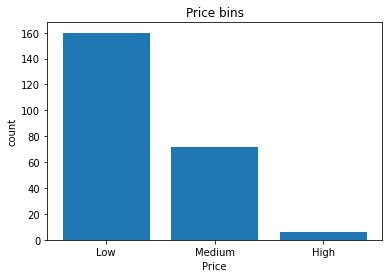

In [55]:
plt.bar(group_name, df["Price_bin"].value_counts())
plt.xlabel("Price")
plt.ylabel("count")
plt.title("Price bins")

In [56]:
df.head(10)

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pound,Price,Price_bin
0,0,Acer,4,IPS Panel,2,1,5,14.000000,0.551724,8,256,3.52800,978,Low
1,1,Dell,3,Full HD,1,1,3,15.598425,0.689655,4,256,4.85100,634,Low
2,2,Dell,3,Full HD,1,1,7,15.598425,0.931034,8,256,4.85100,946,Low
3,3,Dell,4,IPS Panel,2,1,5,13.299213,0.551724,8,128,2.69010,1244,Low
4,4,HP,4,Full HD,2,1,7,15.598425,0.620690,8,256,4.21155,837,Low
5,5,Dell,3,Full HD,1,1,5,15.598425,0.551724,8,256,4.85100,1016,Low
6,6,HP,3,Full HD,3,1,5,15.598425,0.551724,8,256,4.63050,1117,Low
7,7,Acer,3,IPS Panel,2,1,5,15.000000,0.551724,4,256,4.85100,866,Low
8,8,Dell,3,Full HD,1,1,5,15.598425,0.862069,4,256,5.07150,812,Low
9,9,Acer,3,IPS Panel,3,1,7,15.000000,0.620690,8,256,4.85100,1068,Low


## Indicator Variable

Convert the "Screen" attribute of the dataset into 2 indicator variables, "Screen-IPS_panel" and "Screen-Full_HD". Then drop the "Screen" attribute from the dataset.

In [59]:
df.head(10)

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pound,Price,Price_bin
0,0,Acer,4,IPS Panel,2,1,5,14.000000,0.551724,8,256,3.52800,978,Low
1,1,Dell,3,Full HD,1,1,3,15.598425,0.689655,4,256,4.85100,634,Low
2,2,Dell,3,Full HD,1,1,7,15.598425,0.931034,8,256,4.85100,946,Low
3,3,Dell,4,IPS Panel,2,1,5,13.299213,0.551724,8,128,2.69010,1244,Low
4,4,HP,4,Full HD,2,1,7,15.598425,0.620690,8,256,4.21155,837,Low
5,5,Dell,3,Full HD,1,1,5,15.598425,0.551724,8,256,4.85100,1016,Low
6,6,HP,3,Full HD,3,1,5,15.598425,0.551724,8,256,4.63050,1117,Low
7,7,Acer,3,IPS Panel,2,1,5,15.000000,0.551724,4,256,4.85100,866,Low
8,8,Dell,3,Full HD,1,1,5,15.598425,0.862069,4,256,5.07150,812,Low
9,9,Acer,3,IPS Panel,3,1,7,15.000000,0.620690,8,256,4.85100,1068,Low


In [60]:
df["Screen"].value_counts()

Screen
Full HD      161
IPS Panel     77
Name: count, dtype: int64

In [61]:
dummy_variable = pd.get_dummies(df["Screen"])
dummy_variable.rename(columns= {"Full HD":"Screen-Full_HD", "IPS Panel":"IPS Panel"}, inplace = True)
dummy_variable.head(10)

,Screen-Full_HD,IPS Panel
0,False,True
1,True,False
2,True,False
3,False,True
4,True,False
5,True,False
6,True,False
7,False,True
8,True,False
9,False,True


In [62]:
df = pd.concat([df, dummy_variable], axis = 1)
df.head(10)

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pound,Price,Price_bin,Screen-Full_HD,IPS Panel
0,0,Acer,4,IPS Panel,2,1,5,14.000000,0.551724,8,256,3.52800,978,Low,False,True
1,1,Dell,3,Full HD,1,1,3,15.598425,0.689655,4,256,4.85100,634,Low,True,False
2,2,Dell,3,Full HD,1,1,7,15.598425,0.931034,8,256,4.85100,946,Low,True,False
3,3,Dell,4,IPS Panel,2,1,5,13.299213,0.551724,8,128,2.69010,1244,Low,False,True
4,4,HP,4,Full HD,2,1,7,15.598425,0.620690,8,256,4.21155,837,Low,True,False
5,5,Dell,3,Full HD,1,1,5,15.598425,0.551724,8,256,4.85100,1016,Low,True,False
6,6,HP,3,Full HD,3,1,5,15.598425,0.551724,8,256,4.63050,1117,Low,True,False
7,7,Acer,3,IPS Panel,2,1,5,15.000000,0.551724,4,256,4.85100,866,Low,False,True
8,8,Dell,3,Full HD,1,1,5,15.598425,0.862069,4,256,5.07150,812,Low,True,False
9,9,Acer,3,IPS Panel,3,1,7,15.000000,0.620690,8,256,4.85100,1068,Low,False,True


In [63]:
df.drop("Screen", axis = 1, inplace = True)
df.head(10)

,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pound,Price,Price_bin,Screen-Full_HD,IPS Panel
0,0,Acer,4,2,1,5,14.000000,0.551724,8,256,3.52800,978,Low,False,True
1,1,Dell,3,1,1,3,15.598425,0.689655,4,256,4.85100,634,Low,True,False
2,2,Dell,3,1,1,7,15.598425,0.931034,8,256,4.85100,946,Low,True,False
3,3,Dell,4,2,1,5,13.299213,0.551724,8,128,2.69010,1244,Low,False,True
4,4,HP,4,2,1,7,15.598425,0.620690,8,256,4.21155,837,Low,True,False
5,5,Dell,3,1,1,5,15.598425,0.551724,8,256,4.85100,1016,Low,True,False
6,6,HP,3,3,1,5,15.598425,0.551724,8,256,4.63050,1117,Low,True,False
7,7,Acer,3,2,1,5,15.000000,0.551724,4,256,4.85100,866,Low,False,True
8,8,Dell,3,1,1,5,15.598425,0.862069,4,256,5.07150,812,Low,True,False
9,9,Acer,3,3,1,7,15.000000,0.620690,8,256,4.85100,1068,Low,False,True


# Data Cleaning Complete!!!